# Real Data


In [9]:
import pandas as pd

import pop2net as p2n
from pop2net.pop_maker import PopMaker
import pop2net.utils as utils

In [10]:
df_pequiv = pd.read_stata("C:/01-main/03-ac135963/Projekte/p2n/examples/data/pequiv.dta")
df_pequiv = df_pequiv.rename(columns={"d11101": "age"})

In [11]:
df = df_pequiv

In [12]:
df = df.loc[df["syear"] == 2018,]
df.loc[:, "age"] = pd.to_numeric(df["age"], errors="coerce")
df.dropna(inplace=True)

C:\Users\Marius\AppData\Local\Temp\ipykernel_8612\4210135427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "age"] = pd.to_numeric(df["age"], errors="coerce")
C:\Users\Marius\AppData\Local\Temp\ipykernel_8612\4210135427.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "age"] = pd.to_numeric(df["age"], errors="coerce")
C:\Users\Marius\AppData\Local\Temp\ipykernel_8612\4210135427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

In [13]:
class Agent(p2n.Agent):
    pass


class Home(p2n.Location):
    def group(self, agent):
        return agent.hid

In [14]:
class Model(p2n.Model):
    def setup(self):
        self.pop_maker = PopMaker(model=self)
        self.agents, self.locations = self.pop_maker.make(
            df=df,
            n_agents=self.p.n_agents,
            sample_level="hid",
            agent_class=Agent,
            location_classes=[Home],
        )

In [15]:
parameters = {
    "steps": 1,
    "n_agents": 10000,
}
model = Model(parameters=parameters)
model.run()

Completed: 1 steps
Run time: 0:00:52.207053
Simulation finished


DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 2 keys
'reporters': DataFrame with 1 variable and 1 row
}

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90
90,0.0000,0.0002,0.0001,0.0002,0.0000,0.0000,0.0000,0.0001,0.0001,0.0002,0.0001,0.0000,0.0000,0.0001,0.0001,0.0001,0.0000,0.0004,0.0008
85,0.0001,0.0000,0.0002,0.0003,0.0000,0.0000,0.0000,0.0001,0.0000,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0013,0.0026,0.0004
80,0.0001,0.0001,0.0003,0.0007,0.0004,0.0003,0.0002,0.0006,0.0001,0.0006,0.0006,0.0007,0.0005,0.0003,0.0006,0.0031,0.0072,0.0013,0.0000
75,0.0001,0.0002,0.0002,0.0005,0.0003,0.0000,0.0002,0.0003,0.0004,0.0003,0.0001,0.0005,0.0004,0.0007,0.0047,0.0158,0.0031,0.0000,0.0001
70,0.0000,0.0000,0.0000,0.0007,0.0016,0.0005,0.0013,0.0003,0.0012,0.0003,0.0003,0.0016,0.0020,0.0070,0.0140,0.0047,0.0006,0.0000,0.0001
65,0.0002,0.0005,0.0008,0.0009,0.0007,0.0024,0.0021,0.0009,0.0005,0.0004,0.0007,0.0039,0.0085,0.0218,0.0070,0.0007,0.0003,0.0000,0.0001
60,0.0006,0.0008,0.0013,0.0033,0.0074,0.0033,0.0017,0.0030,0.0006,0.0010,0.0023,0.0081,0.0308,0.0085,0.0020,0.0004,0.0005,0.0000,0.0000
55,0.0009,0.0026,0.0065,0.0140,0.0189,0.0105,0.0031,0.0012,0.0010,0.0041,0.0117,0.0276,0.0081,0.0039,0.0016,0.0005,0.0007,0.0000,0.0000
50,0.0025,0.0086,0.0276,0.0473,0.0381,0.0066,0.0016,0.0023,0.0055,0.0166,0.0434,0.0117,0.0023,0.0007,0.0003,0.0001,0.0006,0.0002,0.0001
45,0.0084,0.0248,0.0473,0.0530,0.0224,0.0051,0.0018,0.0061,0.0145,0.0392,0.0166,0.0041,0.0010,0.0004,0.0003,0.0003,0.0006,0.0003,0.0002


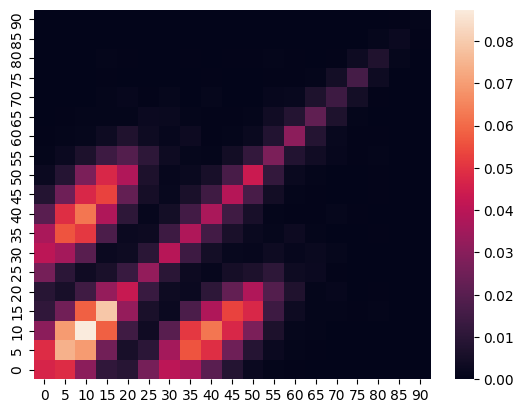

In [16]:
for agent in model.agents:
    agent.age_5 = utils.group_it(
        value=agent.age,
        start=0,
        step=5,
        n_steps=20,
        return_value="lower_bound",
    )

utils.create_contact_matrix(agents=model.agents, attr="age_5", plot=True)